In [9]:
#Importing the required libraries 
import tensorflow as tf
import numpy as np
import cv2

In [7]:
from PIL import Image

In [8]:
from matplotlib import pyplot as plt

In [62]:
from random import randint

Download, Extract and Load the Pre-trained Model

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

Load the Saved Model

In [14]:
model = tf.saved_model.load(export_dir='ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model')

In [15]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_checkpoint_dependencies',
 '_copy_trackable_to_cpu',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_gather_saveables_for_checkpoint',
 '_handle_deferred_dependencies',
 '_lookup_dependency',
 '_maybe_initialize_trackable',
 '_model',
 '_name_based_attribute_restore',
 '_name_based_restores',
 '_no_dependency',
 '_object_identifier',
 '_preload_simple_restoration',
 '_restore_from_tensors',
 '_self_name_based_restores',
 '_self_savea

In [23]:
model.signatures

_SignatureMap({'serving_default': <ConcreteFunction (*, input_tensor: TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name='input_tensor')) -> Dict[['detection_anchor_indices', TensorSpec(shape=(1, 100), dtype=tf.float32, name='detection_anchor_indices')], ['detection_boxes', TensorSpec(shape=(1, 100, 4), dtype=tf.float32, name='detection_boxes')], ['detection_classes', TensorSpec(shape=(1, 100), dtype=tf.float32, name='detection_classes')], ['detection_multiclass_scores', TensorSpec(shape=(1, 100, 91), dtype=tf.float32, name='detection_multiclass_scores')], ['detection_scores', TensorSpec(shape=(1, 100), dtype=tf.float32, name='detection_scores')], ['num_detections', TensorSpec(shape=(1,), dtype=tf.float32, name='num_detections')], ['raw_detection_boxes', TensorSpec(shape=(1, 51150, 4), dtype=tf.float32, name='raw_detection_boxes')], ['raw_detection_scores', TensorSpec(shape=(1, 51150, 91), dtype=tf.float32, name='raw_detection_scores')]] at 0x18BBDEE4750>})

In [76]:
input_image = Image.open('test_image_2.jpg')

In [77]:
input_image_array = np.array(input_image)

In [78]:
input_tensor = tf.convert_to_tensor(value=(np.expand_dims(input_image_array, axis=0)), dtype=tf.uint8)

In [79]:
detection = model(input_tensor)

In [80]:
detection.keys()

dict_keys(['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores'])

In [81]:
boxes = detection['detection_boxes'].numpy()
classes = detection['detection_classes'].numpy().astype(int)
scores = detection['detection_scores'].numpy()

In [82]:
labels = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
          'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 
          'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
          'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
          'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
          'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
          'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 
          'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
          'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
          'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

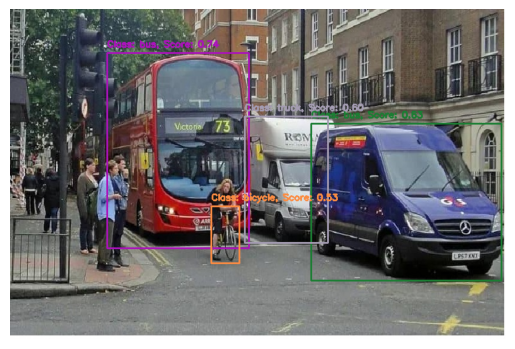

In [83]:

for i in range(classes.shape[1]):
    class_id = int(classes[0, i])
    score = scores[0, i]
 
    if np.any(score > 0.5):  # Filter out low-confidence detections
        h, w, _ = input_image_array.shape
        ymin, xmin, ymax, xmax = boxes[0, i]
 
        # Convert normalized coordinates to image coordinates
        xmin = int(xmin * w)
        xmax = int(xmax * w)
        ymin = int(ymin * h)
        ymax = int(ymax * h)
 
        # Get the class name from the labels list
        class_name = labels[class_id]
 
        random_color = (randint(0, 256), randint(0, 256), randint(0, 256))
 
        # Draw bounding box and label on the image
        cv2.rectangle(input_image_array, (xmin, ymin), (xmax, ymax), random_color, 2)
        label = f"Class: {class_name}, Score: {score:.2f}"
        cv2.putText(input_image_array, label, (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, random_color, 2)
 
# Display the result
plt.imshow(input_image_array)
plt.axis('off')
plt.show()

In [84]:
classes[0, 98]

1

In [85]:
boxes.shape

(1, 100, 4)

In [86]:
boxes[0][0]

array([0.13342017, 0.19639355, 0.7255316 , 0.48219436], dtype=float32)